In [17]:
# k-means clustering on the iris dataset using Python
# Unsupervised Learning - https://github.com/knightkro/kMeans-Python/blob/master/kMeans.py
# Guide video : https://www.youtube.com/watch?v=asW8tp1qiFQ&t=401s

In [1]:
#Packages
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [2]:
# Import the iris dataset
iris = datasets.load_iris()

Text(0, 0.5, 'sepal width (cm)')

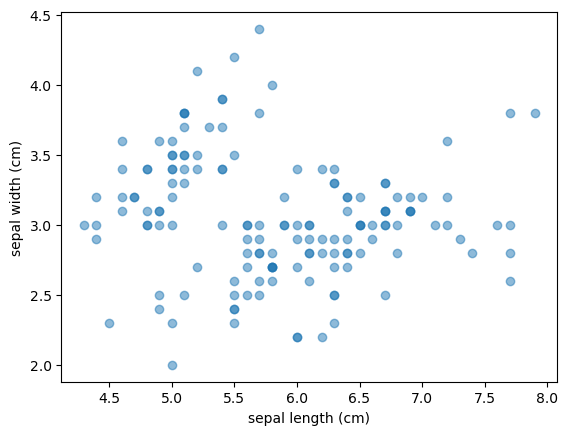

In [3]:
# Do a 2D scatter plot of features. There are 4.
plt.figure(1)
feature_1 = 0
feature_2 = 1
x = iris.data[:,feature_1]
y = iris.data[:,feature_2]
plt.scatter(x,y, alpha = 0.5)
plt.xlabel(iris.feature_names[feature_1])
plt.ylabel(iris.feature_names[feature_2])

In [4]:
# Do k-means clustering with 3 clusters (there are three plants)

model = KMeans(n_clusters=3) 
model.fit(iris.data)
labels = model.predict(iris.data)

Text(0, 0.5, 'sepal width (cm)')

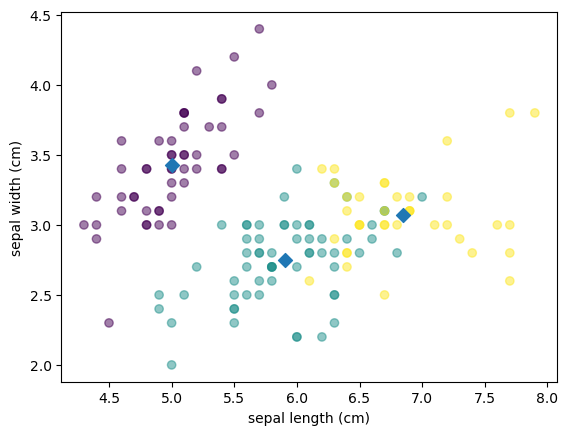

In [5]:
# Do a 2D scatter plot of features coloured by their labels.
# We'll also add the cluster centroids.
plt.figure(2)
centroids = model.cluster_centers_
feature_1 = 0
feature_2 = 1
centroids_1 = centroids[:,feature_1]
centroids_2 = centroids[:,feature_2]
x = iris.data[:,feature_1]
y = iris.data[:,feature_2]
plt.scatter(x,y, c = labels,alpha = 0.5)
plt.scatter(centroids_1,centroids_2, marker = 'D', s = 50)
plt.xlabel(iris.feature_names[feature_1])
plt.ylabel(iris.feature_names[feature_2])

In [6]:
# We'll first use the species labels to evaluate the quality of the clustering
# We'll make a data frame of the labels we found and the actual species
df = pd.DataFrame({'labels': labels, 'species': iris.target}) 

In [7]:
# Now do a crosstab
print('No preprocessing')
ct = pd.crosstab(df['labels'], df['species']) 
print(ct)

No preprocessing
species   0   1   2
labels             
0        50   0   0
1         0  48  14
2         0   2  36


In [8]:
# We can also look at the inertia:
print(model.inertia_)

78.851441426146


In [9]:
#Let's look at how this varies as we vary k
ks = range(1, 6)
inertias = []

In [10]:
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(iris.data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

C:\Users\click\anaconda3\envs\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


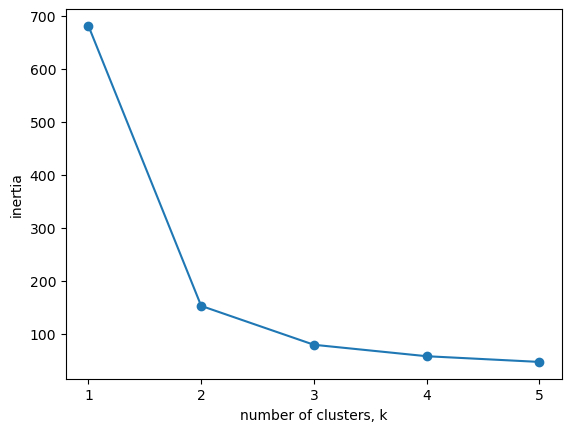

In [11]:
# Plot ks vs inertias
plt.figure(3)
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [12]:
#As an exercise we can try standarising our dataset, using a pipeline
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3) 
pipeline = make_pipeline(scaler, kmeans) 
pipeline.fit(iris.data)
labels2 = pipeline.predict(iris.data)

In [13]:
df2 = pd.DataFrame({'labels': labels2, 'species': iris.target}) 
ct2 = pd.crosstab(df2['labels'], df2['species']) 
print('Standardised')
print(ct2)

Standardised
species   0   1   2
labels             
0         0  11  36
1        50   0   0
2         0  39  14


In [14]:
# Made things worse! What about normalizing instead:
    
normalizer = Normalizer()
kmeans = KMeans(n_clusters=3) 
pipeline = make_pipeline(normalizer, kmeans) 
pipeline.fit(iris.data)
labels3 = pipeline.predict(iris.data)

In [15]:
df3 = pd.DataFrame({'labels': labels3, 'species': iris.target}) 
ct3 = pd.crosstab(df3['labels'], df3['species']) 
print('Normalised')
print(ct3)
# A bit better!

Normalised
species   0   1   2
labels             
0        50   0   0
1         0  45   0
2         0   5  50
